In [67]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/customer_shopping_data.csv")

In [70]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


#Preprocessing

In [71]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [73]:
def preprocessing_data(df):
  df=df.drop_duplicates()
  df["invoice_date"]=pd.to_datetime(df["invoice_date"], dayfirst=True)
  df["invoice_monthyear"]=df["invoice_date"].dt.to_period("M")
  df["total_amount"]=df["quantity"]*df["price"]
  df.drop(["invoice_date"], axis=1, inplace=True)
  numerical_cols=df.select_dtypes(include=["int64","float64"]).columns
  for i in numerical_cols:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]>=(Q1-1.5*IQR)) & (df[i]<=(Q3+1.5*IQR))]
  return df

In [74]:
df=preprocessing_data(df)

In [75]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,invoice_monthyear,total_amount
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11,300.08
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,2021-10,242.40
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,2022-03,40.66
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,2021-01,1200.32


#EDA

##Doanh thu

###Tổng doanh thu theo tháng

In [76]:
t=df.groupby("invoice_monthyear")["total_amount"].sum().sort_values(ascending=False)

In [77]:
t.reset_index()

,invoice_monthyear,total_amount
0,2021-03,3972286.10
1,2022-07,3954997.40
2,2021-07,3940351.06
3,2021-01,3914777.38
4,2021-11,3857616.30
5,2022-10,3833982.78
6,2023-01,3828119.71
7,2021-05,3792258.21
8,2022-01,3779316.31
9,2022-03,3768900.30


In [78]:
t = pd.DataFrame(t.reset_index())

In [79]:
t.sort_values("invoice_monthyear")

,invoice_monthyear,total_amount
3,2021-01,3914777.38
25,2021-02,3396661.92
0,2021-03,3972286.10
11,2021-04,3734405.60
7,2021-05,3792258.21
16,2021-06,3660264.89
2,2021-07,3940351.06
14,2021-08,3692913.23
21,2021-09,3496922.44
13,2021-10,3704013.68


/tmp/ipython-input-80-4027563311.py:7: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


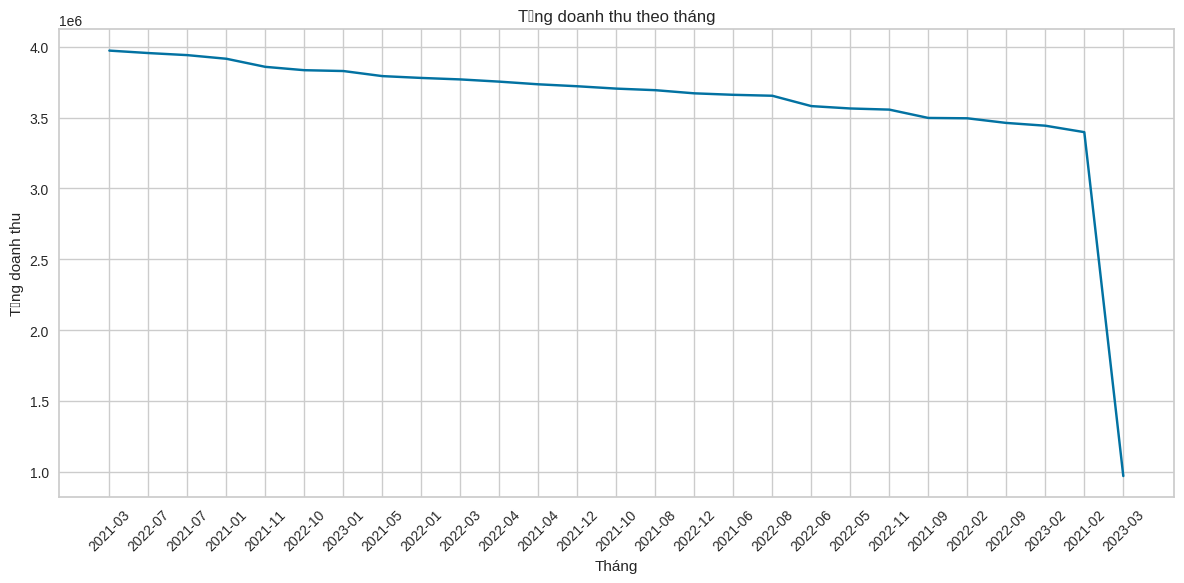

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(t["invoice_monthyear"].astype(str), t["total_amount"])
plt.xlabel("Tháng")
plt.ylabel("Tổng doanh thu")
plt.title("Tổng doanh thu theo tháng")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Bao nhiêu khách hàng quay lại nhiều hơn 1 lần

In [81]:
t=df.groupby("customer_id")["invoice_no"].nunique()

In [82]:
t[t>1]

,invoice_no
customer_id,


###Giới tính nào chiếm tỷ lệ lớn hơn

In [83]:
g=df.groupby("gender")["customer_id"].nunique()/len(df)*100

In [84]:
g

,customer_id
gender,
Female,59.862409
Male,40.137591


In [85]:
g=pd.DataFrame(g.reset_index())

<BarContainer object of 2 artists>

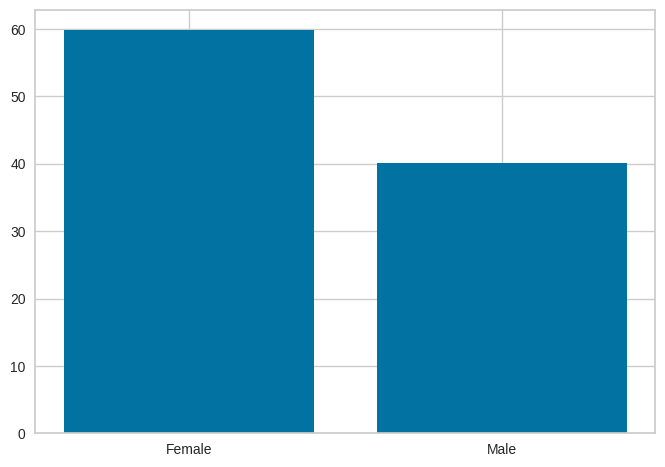

In [86]:
plt.bar(g["gender"],g["customer_id"])

###Top 5 sản phẩm bán chạy nhất

In [87]:
f=df.groupby("category")["quantity"].sum().sort_values(ascending=False)[:5]

In [88]:
f=pd.DataFrame(f.reset_index())

<BarContainer object of 5 artists>

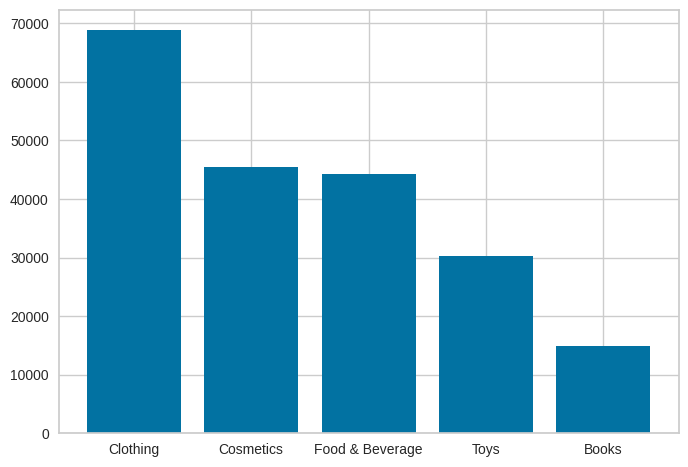

In [89]:
plt.bar(f["category"],f["quantity"])

###Top 3 sản phẩm được mua nhiều nhất theo giới tính

In [90]:
p=df.groupby(["gender","category"])["quantity"].sum().sort_values(ascending=False).reset_index().groupby("gender").head(3).sort_values("gender")

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7843 (\N{LATIN SMALL LETTER A WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7849 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7907 (\N{LATIN SMALL LETTER O WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7873 (\N{LATIN SM

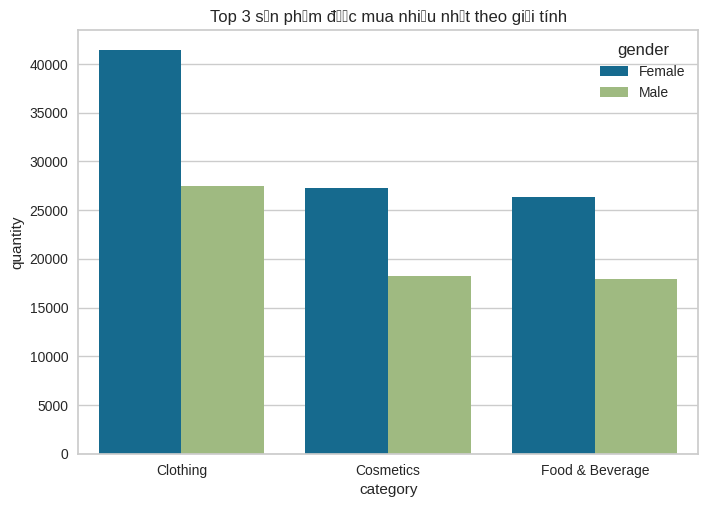

In [91]:
sns.barplot(data=p, x='category', y='quantity', hue='gender')
plt.title('Top 3 sản phẩm được mua nhiều nhất theo giới tính')
plt.show()

#Feature Engineering

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85471 entries, 1 to 99456
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   invoice_no         85471 non-null  object   
 1   customer_id        85471 non-null  object   
 2   gender             85471 non-null  object   
 3   age                85471 non-null  int64    
 4   category           85471 non-null  object   
 5   quantity           85471 non-null  int64    
 6   price              85471 non-null  float64  
 7   payment_method     85471 non-null  object   
 8   shopping_mall      85471 non-null  object   
 9   invoice_monthyear  85471 non-null  period[M]
 10  total_amount       85471 non-null  float64  
dtypes: float64(2), int64(2), object(6), period[M](1)
memory usage: 7.8+ MB


In [93]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,invoice_monthyear,total_amount
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,2021-12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,2021-11,300.08
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,2021-10,242.40
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,2022-03,40.66
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,2021-01,1200.32


In [94]:
customer_df = df.groupby('customer_id').agg({
    'gender': 'first',
    'age': 'mean',
    'quantity': 'sum',
    'total_amount': 'sum',
    'invoice_no': 'nunique',
    'category': 'nunique',
    'payment_method': 'nunique',
    'shopping_mall': 'nunique'
}).reset_index()

In [95]:
customer_df.head()

,customer_id,gender,age,quantity,total_amount,invoice_no,category,payment_method,shopping_mall
0,C100005,Male,34.0,2,2400.68,1,1,1,1
1,C100006,Male,44.0,3,322.56,1,1,1,1
2,C100012,Male,25.0,5,130.75,1,1,1,1
3,C100019,Female,21.0,1,35.84,1,1,1,1
4,C100025,Male,55.0,2,143.36,1,1,1,1


#A/B testing

H0: total_amount của nam bằng nữ

H1: total_amount của nam thấp hơn nữ

In [99]:
male=np.array(customer_df[customer_df["gender"]=="Male"]["total_amount"])
female=np.array(customer_df[customer_df["gender"]=="Female"]["total_amount"])

In [102]:
from scipy import stats

# T-test độc lập
t_stat, p_value_two_tailed = stats.ttest_ind(male, female, equal_var=False)

# One-tailed p-value: kiểm tra nam < nữ
if t_stat < 0:  # Chiều đúng
    p_value_one_tailed = p_value_two_tailed / 2
else:  # Chiều ngược, p-value = 1 - p/2
    p_value_one_tailed = 1 - p_value_two_tailed / 2

print("T-statistic:", t_stat)
print("P-value (one-tailed):", p_value_one_tailed)

# Kết luận
alpha = 0.05
if p_value_one_tailed < alpha and t_stat < 0:
    print("Kết luận: Total_amount của nam THẤP HƠN nữ (có ý nghĩa thống kê)")
else:
    print("Không đủ bằng chứng để kết luận total_amount của nam thấp hơn nữ")


T-statistic: -0.17946774806943439
P-value (one-tailed): 0.4287854672563307
Không đủ bằng chứng để kết luận total_amount của nam thấp hơn nữ


#KMeans clustering

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
customer_df["gender"]=label.fit_transform(customer_df["gender"])

In [60]:
features = customer_df[['gender', 'age', 'quantity', 'total_amount',
                        'invoice_no', 'category', 'payment_method', 'shopping_mall']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [61]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

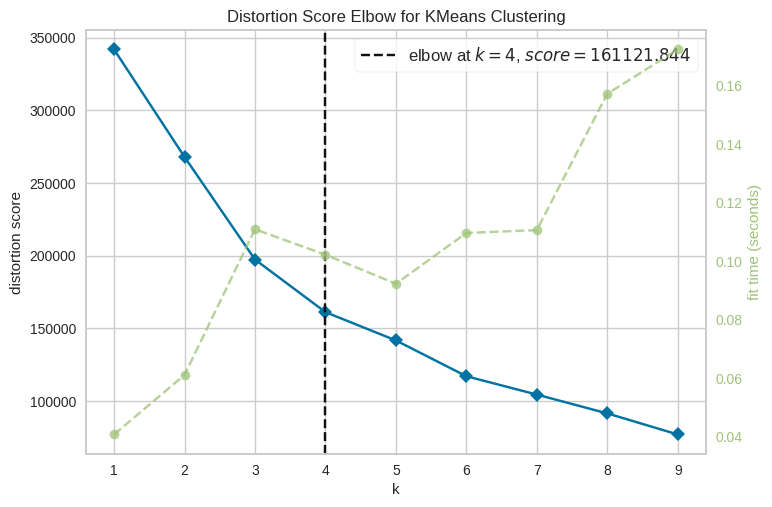

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
elbow=KElbowVisualizer(KMeans(),k=(1,10))
elbow.fit(scaled_features)
elbow.show()

In [63]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [64]:
kmeans.cluster_centers_

array([[-8.18839063e-01,  8.71511627e-01, -9.33144223e-02,
        -3.12381737e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.89648422e-03, -6.99759024e-04,  6.47835758e-01,
         2.39906371e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-8.18839063e-01, -8.55008414e-01, -7.42488178e-02,
        -3.12255712e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.22124120e+00, -4.11115572e-03, -8.55862865e-02,
        -3.13548824e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]])

In [65]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)

In [66]:
customer_df.groupby('Cluster')[['age', 'quantity', 'total_amount']].mean()

,age,quantity,total_amount
Cluster,,,
0,43.384296,3.197323,800.365546
1,43.474357,1.361613,418.495160
2,43.362749,3.803715,825.531386
3,43.402982,3.593265,4862.667818


Chia làm 4 nhóm khách hàng từ đó có những strategy hợp lý

Cluster 0: Số lượng mua trung bình khá thấp, Tổng chi tiêu tầm trung. Chiến lược tập trung upsell/cross-sell để tăng quantity và nâng giá trị đơn hàng

Cluster 1: Số lượng mua trung bình rất thấp, Tổng chi tiêu thấp nhất. Chiến lược: Chạy chương trình khuyến mãi, bundle sản phẩm để khuyến khích mua nhiều hơn.

Cluster 2: Số lượng mua trung bình cao nhất, Tổng chi tiêu tầm trung. Chiến lược: Nhóm này thích mua nhiều, nên đẩy gói combo và membership program để tăng loyalty.

Cluster 3: Số lượng mua trung bình cao, Tổng chi tiêu rất cao, Chiến lược: Đây là VIP/Platinum customers, cần ưu đãi riêng như dịch vụ premium, quà tặng cá nhân hóa, chăm sóc đặc biệt để giữ chân.